In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing

In [3]:
midatl = pd.read_excel('MIDATL.xlsx').set_index('index').fillna(method='ffill')

In [4]:
midatl.index = pd.to_datetime(midatl.index).round('h')
midatl['WeekNumber'] = midatl.index.week

# Solar

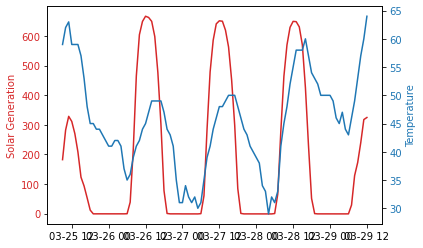

In [5]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(midatl.index[2000:2100], midatl['MIDATL_solar'][2000:2100], color=color)
ax1.set_ylabel('Solar Generation', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.plot(midatl.index[2000:2100], midatl['HourlyDryBulbTemperature'][2000:2100], color=color)
ax2.set_ylabel('Temperature', color=color)
ax2.tick_params(axis='y', labelcolor=color)

In [6]:
X = midatl.drop(midatl.columns[-4:-1], axis=1)
y = midatl['MIDATL_solar']

split = 0.99

X_train, X_test, y_train, y_test = X[:int(split*len(X))], X[int(split*len(X)):], y[:int(split*len(X))], y[int(split*len(X)):]

In [7]:
tree = RandomForestRegressor()
tree.fit(X_train,y_train)
score_tree = tree.score(X_test,y_test)
tree_predict = tree.predict(X_test)

In [8]:
r2_score(y_test, tree_predict)

0.2968554078182617

In [9]:
y_pred = tree.predict(X)

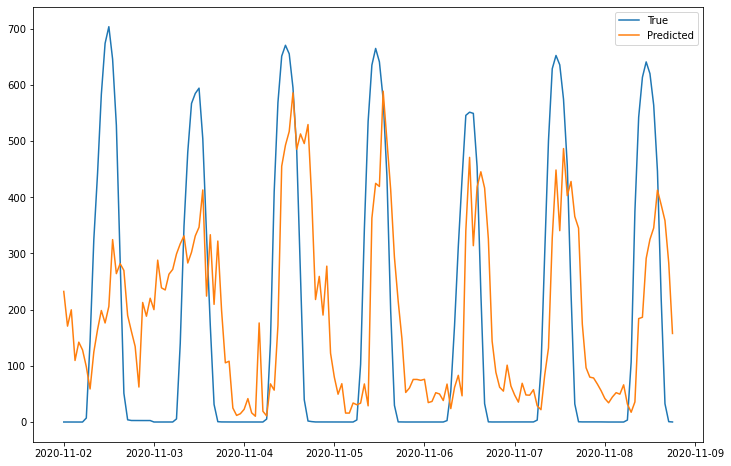

In [10]:
plt.figure(figsize=(12, 8))
plt.plot(midatl.index[int(split*len(X)):], midatl['MIDATL_solar'][int(split*len(X)):], label = 'True')
plt.plot(midatl.index[int(split*len(X)):], y_pred[int(split*len(X)):], label = 'Predicted')
plt.legend()

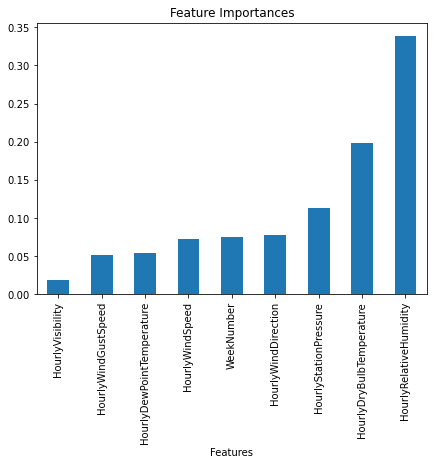

In [11]:
feature_importance_df = pd.DataFrame({'Feature Importances': tree.feature_importances_, 'Features': X_train.columns.values})

feature_importance_df.sort_values('Feature Importances').plot.bar(x = 'Features', figsize = (7, 5), legend=False, title='Feature Importances');

In [12]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)
y_pred = lm.predict(X)

In [13]:
r2_score(y, y_pred)

0.4336518503867711

In [14]:
coefs = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(np.transpose(lm.coef_), columns = ['Coefficients'])], axis = 1)
coefs = coefs.set_index(0)

In [15]:
coefs.sort_values('Coefficients', ascending = False)

,Coefficients
0,
HourlyStationPressure,124.736956
HourlyDryBulbTemperature,17.822579
HourlyWindSpeed,6.157117
HourlyRelativeHumidity,1.635422
HourlyWindDirection,-0.110150
WeekNumber,-0.328785
HourlyWindGustSpeed,-0.911161
HourlyVisibility,-7.258908
HourlyDewPointTemperature,-14.246384


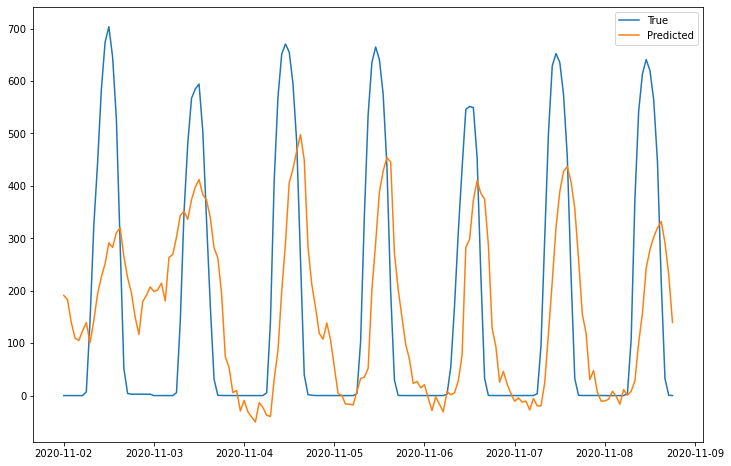

In [16]:
plt.figure(figsize=(12, 8))
plt.plot(midatl.index[int(split*len(X)):], midatl['MIDATL_solar'][int(split*len(X)):], label = 'True')
plt.plot(midatl.index[int(split*len(X)):], y_pred[int(split*len(X)):], label = 'Predicted')
plt.legend()

# Wind

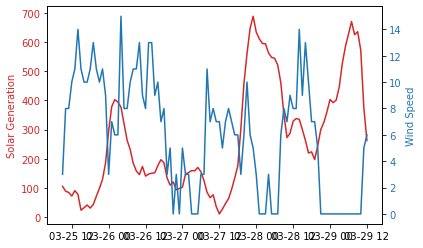

In [17]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(midatl.index[2000:2100], midatl['MIDATL_wind'][2000:2100], color=color)
ax1.set_ylabel('Solar Generation', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.plot(midatl.index[2000:2100], midatl['HourlyWindSpeed'][2000:2100], color=color)
ax2.set_ylabel('Wind Speed', color=color)
ax2.tick_params(axis='y', labelcolor=color)

In [18]:
X = midatl.drop(midatl.columns[-4:-1], axis=1)
y = midatl['MIDATL_wind']

split = 0.99

X_train, X_test, y_train, y_test = X[:int(split*len(X))], X[int(split*len(X)):], y[:int(split*len(X))], y[int(split*len(X)):]

In [19]:
tree = RandomForestRegressor()
tree.fit(X_train,y_train)
score_tree = tree.score(X_test,y_test)
tree_predict = tree.predict(X_test)

In [20]:
r2_score(y_test, tree_predict)

0.28791243020408175

In [21]:
y_pred = tree.predict(X)

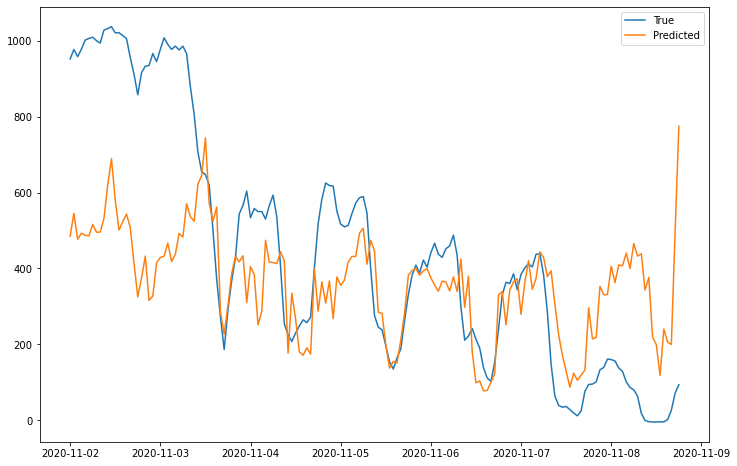

In [22]:
plt.figure(figsize=(12, 8))
plt.plot(midatl.index[int(split*len(X)):], midatl['MIDATL_wind'][int(split*len(X)):], label = 'True')
plt.plot(midatl.index[int(split*len(X)):], y_pred[int(split*len(X)):], label = 'Predicted')
plt.legend()

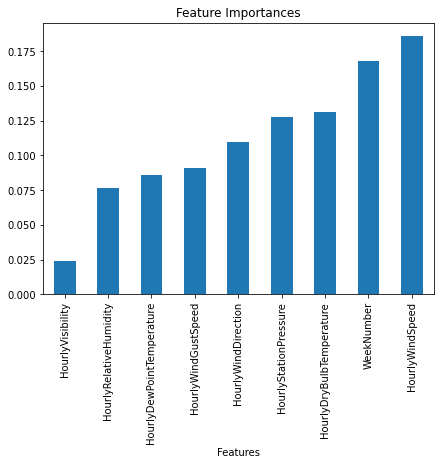

In [23]:
feature_importance_df = pd.DataFrame({'Feature Importances': tree.feature_importances_, 'Features': X_train.columns.values})

feature_importance_df.sort_values('Feature Importances').plot.bar(x = 'Features', figsize = (7, 5), legend=False, title='Feature Importances');

In [24]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)
y_pred = lm.predict(X)

In [25]:
r2_score(y, y_pred)

0.29641555749398696

In [26]:
coefs = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(np.transpose(lm.coef_), columns = ['Coefficients'])], axis = 1)
coefs = coefs.set_index(0)

In [27]:
coefs.sort_values('Coefficients', ascending = False)

,Coefficients
0,
HourlyWindSpeed,16.587122
HourlyVisibility,14.052602
HourlyWindGustSpeed,6.272772
HourlyRelativeHumidity,3.409813
HourlyDryBulbTemperature,0.402853
HourlyWindDirection,0.080764
WeekNumber,-0.951230
HourlyDewPointTemperature,-5.807052
HourlyStationPressure,-207.871258


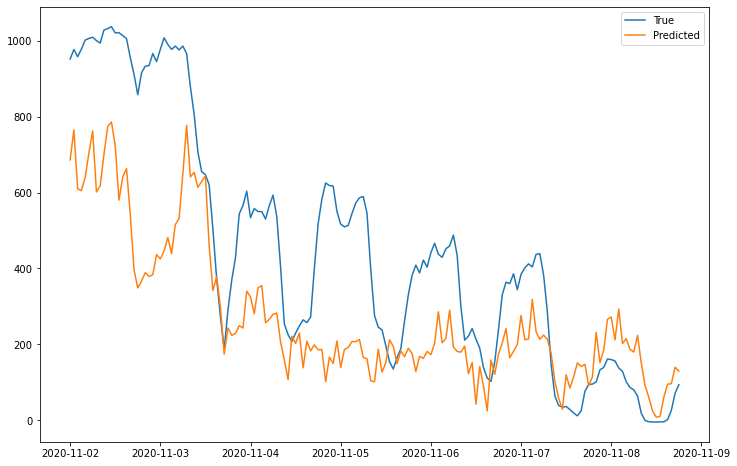

In [28]:
plt.figure(figsize=(12, 8))
plt.plot(midatl.index[int(split*len(X)):], midatl['MIDATL_wind'][int(split*len(X)):], label = 'True')
plt.plot(midatl.index[int(split*len(X)):], y_pred[int(split*len(X)):], label = 'Predicted')
plt.legend()

# Demand

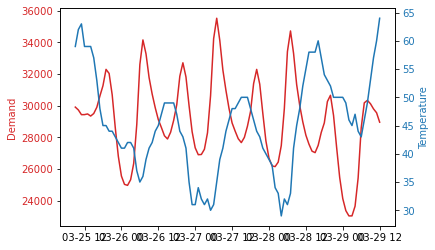

In [29]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(midatl.index[2000:2100], midatl['MIDATL_demand'][2000:2100], color=color)
ax1.set_ylabel('Demand', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.plot(midatl.index[2000:2100], midatl['Temperature'][2000:2100], color=color)
ax2.set_ylabel('Temperature', color=color)
ax2.tick_params(axis='y', labelcolor=color)

In [30]:
X = midatl.drop(midatl.columns[-4:-1], axis=1)
y = midatl['MIDATL_demand']

split = 0.99

X_train, X_test, y_train, y_test = X[:int(split*len(X))], X[int(split*len(X)):], y[:int(split*len(X))], y[int(split*len(X)):]

In [31]:
tree = RandomForestRegressor()
tree.fit(X_train,y_train)
score_tree = tree.score(X_test,y_test)
tree_predict = tree.predict(X_test)

In [32]:
r2_score(y_test, tree_predict)

-0.22393689114704984

In [33]:
y_pred = tree.predict(X)

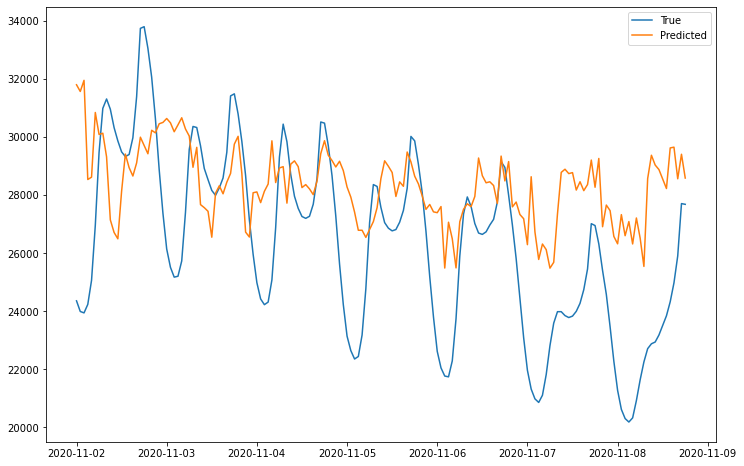

In [34]:
plt.figure(figsize=(12, 8))
plt.plot(midatl.index[int(split*len(X)):], midatl['MIDATL_demand'][int(split*len(X)):], label = 'True')
plt.plot(midatl.index[int(split*len(X)):], y_pred[int(split*len(X)):], label = 'Predicted')
plt.legend()

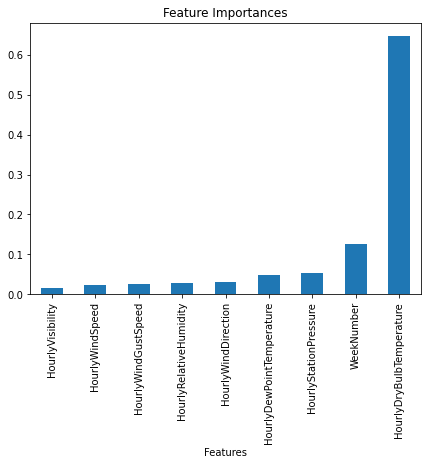

In [35]:
feature_importance_df = pd.DataFrame({'Feature Importances': tree.feature_importances_, 'Features': X_train.columns.values})

feature_importance_df.sort_values('Feature Importances').plot.bar(x = 'Features', figsize = (7, 5), legend=False, title='Feature Importances');

In [36]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)
y_pred = lm.predict(X)

In [37]:
r2_score(y, y_pred)

0.15010174546862975

In [38]:
coefs = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(np.transpose(lm.coef_), columns = ['Coefficients'])], axis = 1)
coefs = coefs.set_index(0)

In [39]:
coefs.sort_values('Coefficients', ascending = False)

,Coefficients
0,
HourlyStationPressure,1311.329585
HourlyDewPointTemperature,522.326017
HourlyWindDirection,3.303386
HourlyWindGustSpeed,-2.092099
WeekNumber,-41.142161
HourlyWindSpeed,-67.432544
HourlyRelativeHumidity,-306.858989
HourlyDryBulbTemperature,-368.538379
HourlyVisibility,-409.605499


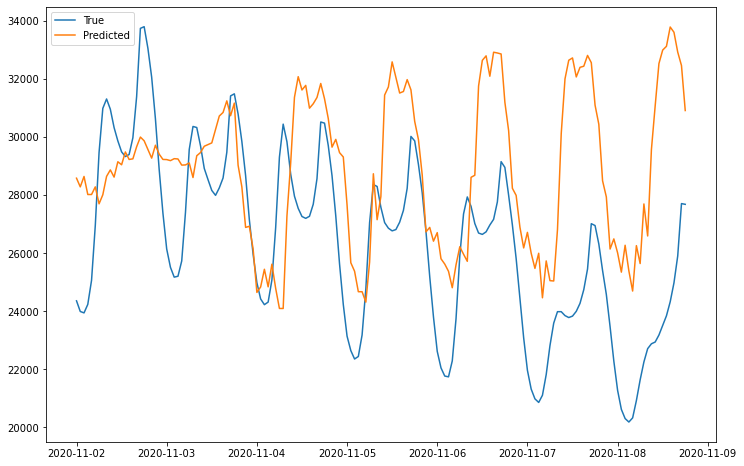

In [40]:
plt.figure(figsize=(12, 8))
plt.plot(midatl.index[int(split*len(X)):], midatl['MIDATL_demand'][int(split*len(X)):], label = 'True')
plt.plot(midatl.index[int(split*len(X)):], y_pred[int(split*len(X)):], label = 'Predicted')
plt.legend()